   Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

          Timestamp  Clicked on Ad  
0  27-03-2016 00:53              0  
1  04-04-2016 01:39           

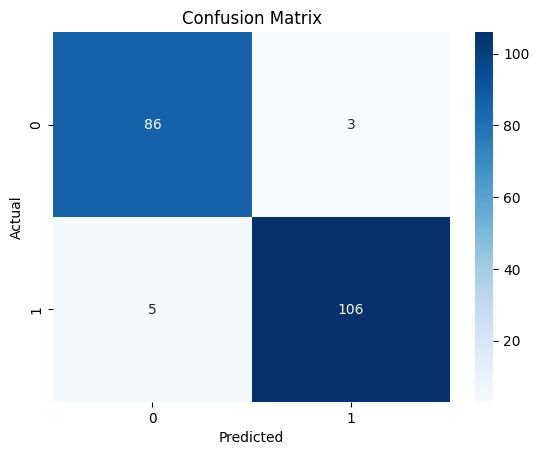

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        89
           1       0.97      0.95      0.96       111

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
file_path = '/content/Dataset 2.csv'  # Update with your actual file path
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

# Drop non-numeric and irrelevant columns
df = df.drop(columns=['Ad Topic Line', 'City', 'Country', 'Timestamp'])

# Check for missing values
print(df.isnull().sum())

# Split the data into features and target variable
X = df.drop(columns=['Clicked on Ad'])
y = df['Clicked on Ad']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))


                    Feature  Coefficient
3      Daily Internet Usage    -2.704029
0  Daily Time Spent on Site    -2.525533
2               Area Income    -1.637048
1                       Age     1.250561
4                      Male    -0.358627


<ipython-input-4-e8743e010385>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='coolwarm')


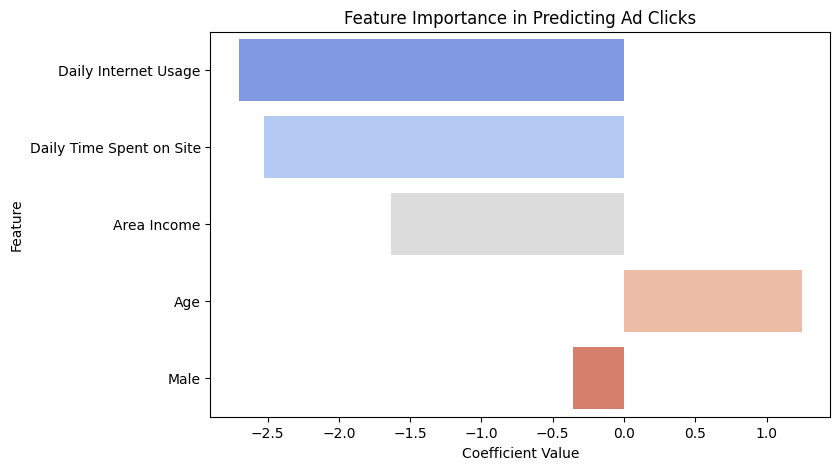

In [ ]:
# Get feature importance (coefficients)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})

# Sort by absolute value of coefficient
feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Display feature importance
print(feature_importance[['Feature', 'Coefficient']])

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='coolwarm')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance in Predicting Ad Clicks')
plt.show()


<ipython-input-5-453a769ca9b4>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_click_rate = df.groupby('Age Group')['Clicked on Ad'].mean() * 100
<ipython-input-5-453a769ca9b4>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_click_rate.index, y=age_click_rate.values, palette='viridis')


Age Group
16-25     23.943662
26-35     28.883495
36-45     58.787879
46-55     89.440994
56-65    100.000000
Name: Clicked on Ad, dtype: float64


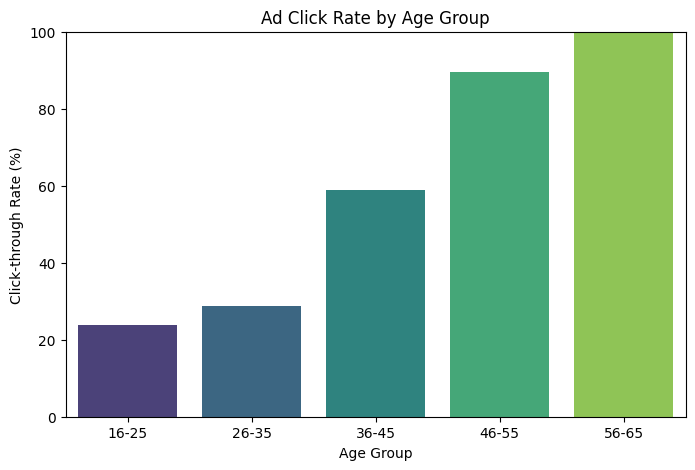

In [ ]:
# Create Age Bins
bins = [15, 25, 35, 45, 55, 65]  # Define age ranges
labels = ['16-25', '26-35', '36-45', '46-55', '56-65']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Calculate Click-through Rate (CTR) for each age group
age_click_rate = df.groupby('Age Group')['Clicked on Ad'].mean() * 100

# Display Click-through Rate
print(age_click_rate)

# Plot the Age vs CTR
plt.figure(figsize=(8, 5))
sns.barplot(x=age_click_rate.index, y=age_click_rate.values, palette='viridis')
plt.xlabel('Age Group')
plt.ylabel('Click-through Rate (%)')
plt.title('Ad Click Rate by Age Group')
plt.ylim(0, 100)
plt.show()


Female    51.830443
Male      48.024948
Name: Clicked on Ad, dtype: float64


<ipython-input-6-0994494e686c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_click_rate.index, y=gender_click_rate.values, palette='coolwarm')


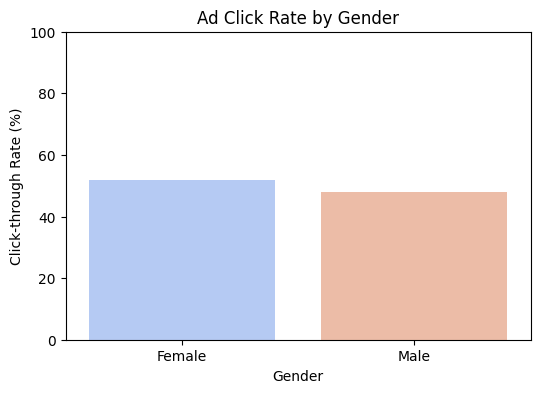

In [ ]:
# Calculate Click-through Rate (CTR) by gender
gender_click_rate = df.groupby('Male')['Clicked on Ad'].mean() * 100

# Rename index for better understanding
gender_click_rate.index = ['Female', 'Male']

# Display CTR by gender
print(gender_click_rate)

# Plot the CTR by gender
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_click_rate.index, y=gender_click_rate.values, palette='coolwarm')
plt.xlabel('Gender')
plt.ylabel('Click-through Rate (%)')
plt.title('Ad Click Rate by Gender')
plt.ylim(0, 100)
plt.show()


<ipython-input-7-b07b57d22e39>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  internet_click_rate = df.groupby('Internet Usage Group')['Clicked on Ad'].mean() * 100
<ipython-input-7-b07b57d22e39>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_click_rate = df.groupby('Income Group')['Clicked on Ad'].mean() * 100
<ipython-input-7-b07b57d22e39>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=internet_click_rate.index, y=internet_click_rate.values,

Click-through Rate by Internet Usage:
 Internet Usage Group
0-100            NaN
101-200    77.339901
201-300     7.416880
301-400          NaN
Name: Clicked on Ad, dtype: float64

Click-through Rate by Area Income:
 Income Group
0-25K       100.000000
25K-50K      81.914894
50K-75K      35.000000
75K-100K     35.483871
100K+              NaN
Name: Clicked on Ad, dtype: float64


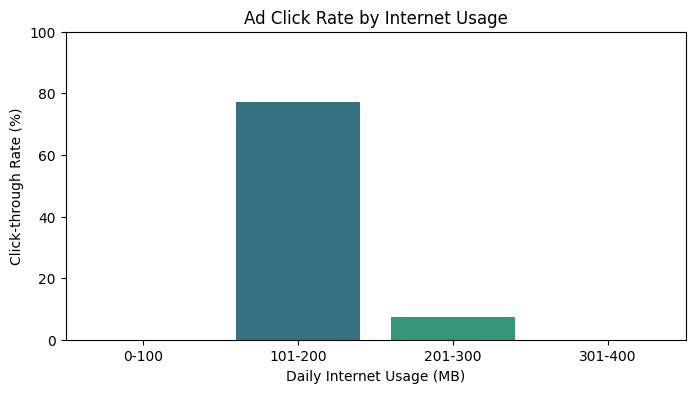

<ipython-input-7-b07b57d22e39>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=income_click_rate.index, y=income_click_rate.values, palette='plasma')


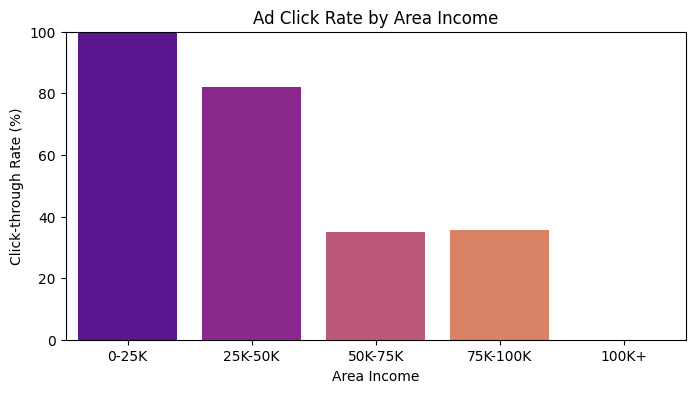


Correlation with Clicked on Ad:
 Daily Internet Usage   -0.786539
Area Income            -0.476255
Clicked on Ad           1.000000
Name: Clicked on Ad, dtype: float64


In [ ]:
# Binning Daily Internet Usage into categories
bins_internet = [0, 100, 200, 300, 400]  # Adjust bins based on dataset range
labels_internet = ['0-100', '101-200', '201-300', '301-400']
df['Internet Usage Group'] = pd.cut(df['Daily Internet Usage'], bins=bins_internet, labels=labels_internet, right=False)

# Binning Area Income into categories
bins_income = [0, 25000, 50000, 75000, 100000, 150000]  # Adjust bins based on dataset range
labels_income = ['0-25K', '25K-50K', '50K-75K', '75K-100K', '100K+']
df['Income Group'] = pd.cut(df['Area Income'], bins=bins_income, labels=labels_income, right=False)

# Calculate Click-through Rate (CTR) for each group
internet_click_rate = df.groupby('Internet Usage Group')['Clicked on Ad'].mean() * 100
income_click_rate = df.groupby('Income Group')['Clicked on Ad'].mean() * 100

# Display CTR for Internet Usage & Area Income
print("Click-through Rate by Internet Usage:\n", internet_click_rate)
print("\nClick-through Rate by Area Income:\n", income_click_rate)

# Plot Internet Usage vs CTR
plt.figure(figsize=(8, 4))
sns.barplot(x=internet_click_rate.index, y=internet_click_rate.values, palette='viridis')
plt.xlabel('Daily Internet Usage (MB)')
plt.ylabel('Click-through Rate (%)')
plt.title('Ad Click Rate by Internet Usage')
plt.ylim(0, 100)
plt.show()

# Plot Area Income vs CTR
plt.figure(figsize=(8, 4))
sns.barplot(x=income_click_rate.index, y=income_click_rate.values, palette='plasma')
plt.xlabel('Area Income')
plt.ylabel('Click-through Rate (%)')
plt.title('Ad Click Rate by Area Income')
plt.ylim(0, 100)
plt.show()

# Check correlation between features and ad clicks
correlation = df[['Daily Internet Usage', 'Area Income', 'Clicked on Ad']].corr()
print("\nCorrelation with Clicked on Ad:\n", correlation['Clicked on Ad'])
